In [81]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [40]:
df = pd.read_csv('/content/drive/MyDrive/Python Data Science/Project/salaries.csv' , index_col = 'Unnamed: 0')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [41]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [42]:
df.drop(['work_year' , 'salary' , 'salary_currency', 'employee_residence', 'company_location'], axis = 1, inplace = True)

In [43]:
df.head()

,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
0,MI,FT,Data Scientist,79833,0,L
1,SE,FT,Machine Learning Scientist,260000,0,S
2,SE,FT,Big Data Engineer,109024,50,M
3,MI,FT,Product Data Analyst,20000,0,S
4,SE,FT,Machine Learning Engineer,150000,50,L


In [45]:
print("Columns in df : ")
colDataType = lambda col : 'Categorical' if df[col].dtype == 'O' else 'Numerical'
categorical_var = []
numerical_var   = []
for ind , col in enumerate(df.columns):
    dtype = colDataType(col)
    print(f'  {ind+1}. data type of {col} is : {dtype}')
    if dtype == 'Categorical':
        categorical_var.append(col)
    else:
        numerical_var.append(col)

Columns in df : 
  1. data type of experience_level is : Categorical
  2. data type of employment_type is : Categorical
  3. data type of job_title is : Categorical
  4. data type of salary_in_usd is : Numerical
  5. data type of remote_ratio is : Numerical
  6. data type of company_size is : Categorical


In [46]:
df = df.astype({
    'experience_level' : 'category',
    'employment_type' : 'category',
    'job_title' : 'category' ,
    'company_size' : 'category'
})

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   experience_level  607 non-null    category
 1   employment_type   607 non-null    category
 2   job_title         607 non-null    category
 3   salary_in_usd     607 non-null    int64   
 4   remote_ratio      607 non-null    int64   
 5   company_size      607 non-null    category
dtypes: category(4), int64(2)
memory usage: 19.6 KB


In [48]:
df = df.astype({'remote_ratio' : 'i1'})

In [49]:
df.info(memory_usage = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   experience_level  607 non-null    category
 1   employment_type   607 non-null    category
 2   job_title         607 non-null    category
 3   salary_in_usd     607 non-null    int64   
 4   remote_ratio      607 non-null    int8    
 5   company_size      607 non-null    category
dtypes: category(4), int64(1), int8(1)
memory usage: 15.4 KB


In [65]:
X = df.drop('salary_in_usd' , axis = 1)
y = df['salary_in_usd'].copy()

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
X[categorical_var] = encoder.fit_transform(X[categorical_var])

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [68]:
X_train.iloc[:5]

,experience_level,employment_type,job_title,remote_ratio,company_size
124,0.0,3.0,12.0,50,1.0
434,2.0,2.0,17.0,100,1.0
472,3.0,2.0,22.0,100,1.0
185,2.0,2.0,17.0,100,1.0
228,3.0,2.0,22.0,0,0.0


In [69]:
categorical_var

['experience_level', 'employment_type', 'job_title', 'company_size']

In [70]:
model = LinearRegression()

In [72]:
model = model.fit(X_train, y_train)

In [73]:
model.intercept_

121528.12561773759

In [74]:
model.coef_

array([ 19904.48702613, -33240.82163824,    672.48530735,    179.26440452,
       -13429.39110023])

In [75]:
from sklearn.metrics import mean_squared_error, r2_score

In [78]:
mean_squared_error(y_test , model.predict(X_test))

3835806294.627456

In [84]:
test_error  = []
train_error = []
for i in range(1 , 101):
    model = LinearRegression(n_jobs = i)
    model = model.fit(X_train, y_train)

    test_error.append( mean_squared_error(y_test , model.predict(X_test)) )
    train_error.append( mean_squared_error(y_train , model.predict(X_train)) )

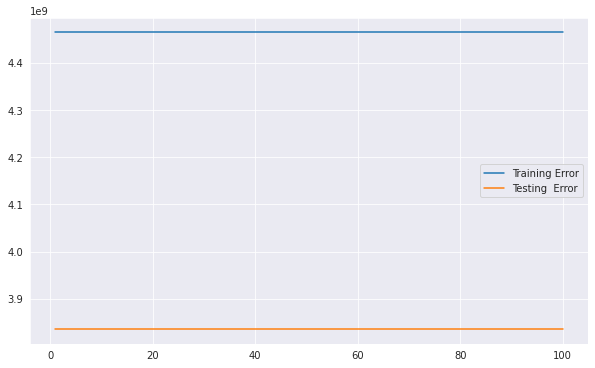

In [85]:
plt.figure(figsize = (10 , 6))
plt.plot(range(1,101), train_error , label = "Training Error")
plt.plot(range(1,101), test_error  , label = "Testing  Error")

plt.legend()

In [86]:
model.predict(X_test[:5])

array([130689.24299667, 130689.24299667, 102714.93228229, 203473.01118699,
       106287.70661852])

In [88]:
y_test[:5]

563    140250
289    135000
76     100000
78     270000
182     26005
Name: salary_in_usd, dtype: int64

In [89]:
model.predict(X_test[:5]) - y_test[:5]

563    -9560.757003
289    -4310.757003
76      2714.932282
78    -66526.988813
182    80282.706619
Name: salary_in_usd, dtype: float64